# Module 5: Assignment 1

# Problem 1
-----------

How many possible colors can be represented with the 24-bit RGB model?

> The RGB color model has three colour channels: `red`, `green` and `blue`. In the 24-bit model, each of the three channels has 8 bits, allowing for 256 possible values per channel (from 0 to 255).
> The total number of different colours that can be represented with the 24-bit RGB model is:
> 
> 256 × 256 × 256 = 16,777,216.
> 
> **16,777,216** different colours


Imagine that we have a fairly large, but very boring image: a 5,000 × 5,000 pixel image composed of nothing but white pixels. If we used an uncompressed image format such as BMP, with the 24-bit RGB color model, how much storage would be required for the file?

> answer

> Each pixel is represented by 24 bits (3 bytes).
> 
> Storage requirement Computation:
> 1. Total number of pixels:
>    5,000 x 5,000 = 25,000,000 (pixels)
> 2. Total storage required in bytes (each pixel taking up 3 bytes):
   25,000,000 x 3 = 75,000,000 (bytes)
> 3. Convert to megabytes (MB): divide by 1,024 x 1,024
>    
>    $\frac{75,000,000}{(1,024 \times 1,024)}\approx 71.53\text{ MB}$

> The uncompressed image file would require approximately **71.53 MB** of storage.

Create a 5,000 x 5,000 pixel white image using `skimage` and save it to a file as `BMP` format. How does the size compare to your prediction? Save a version in JPEG format. How does the size compare? 

### Create a 5,000 x 5,000 pixel white image 

In [1]:
import skimage as ski
from skimage import io, color
import numpy as np
from PIL import Image

import os

# creates a 5000x5000 pixel image with 3 channels (RGB)
image_size = (5000, 5000, 3) 
# each pixel has a value of 255 (white)
white_image = np.full(image_size, 255, dtype=np.uint8)  # Numpy array 

# Save the image as a BMP file
bmp_path = './images/white_image.bmp'
# For BMP: convert the image data to 8-bit unsigned integer format
io.imsave(bmp_path, ski.util.img_as_ubyte(white_image))

# Check file size
bmp_size = os.path.getsize(bmp_path) / (1024 * 1024)  # in MB
print("The BMP file size is {:0.2f} (MB)\n".format(bmp_size))

The BMP file size is 71.53 (MB)



/var/folders/kv/mpzyqfp12s57194ttwpzx6rc0000gn/T/ipykernel_77143/3790857877.py:16: UserWarning: ./images/white_image.bmp is a low contrast image
  io.imsave(bmp_path, ski.util.img_as_ubyte(white_image))


> <em>How does the size compare to your prediction? </em>
>
> - Prediction: 71.53 MB
> - Actual: 71.53 MB
> 
> The Actual file size is exactly the same as what was predicted

### Save a version in JPEG format

In [2]:
# Save as JPEG
jpeg_path = './images/white_image.jpg'

# Convert the NumPy array to a PIL Image
image = Image.fromarray(white_image)

# Save the image as a JPEG
image.save(jpeg_path)

# Check file size
jpeg_size = os.path.getsize(jpeg_path) / (1024 * 1024)  # in MB
print("The JPEG file size is {:0.2f} (MB)\n".format(jpeg_size))

The JPEG file size is 0.37 (MB)



> <em> Save a version in JPEG format. How does the size compare? </em>
>
> - JPEG: 0.37 MB
> - BMP: 71.53 MB
> 
> The JPEG file size is significantly smaller.

Compress your `.bmp` image using `gzip` and compare the size to the `.jpg` file. Which compression is better?

In [3]:
import gzip

gzip_path = './images/white_image.bmp.gz'
with open(bmp_path, 'rb') as f_in:
    with gzip.open(gzip_path, 'wb') as f_out:
        f_out.writelines(f_in)
        f_out.close()
        f_in.close()

# Check the size of the gzipped BMP file
gzip_size = os.path.getsize(gzip_path) / (1024 * 1024)  # in MB

print("The gzip file size is {:0.2f} (MB)\n".format(gzip_size))

The gzip file size is 0.07 (MB)



> <em> Save a version in JPEG format. How does the size compare? </em>
>
> - GZIP: 0.07 MB
> - JPEG: 0.37 MB
> 
> The gzipped BMP file is significantly smaller than the JPEG file. This is because gzip is an all-purpose compressor and is more efficient for a uniformly white image (since there is highly repetitive data). The JPEG compression is optimized for photographic data with varying colors, so it doesn’t compress uniform data as effectively in our case.

Select an image and load it into the notebook. Please make sure that the image is referenced correctly in the repository so that it can be loaded from a downloaded repository.

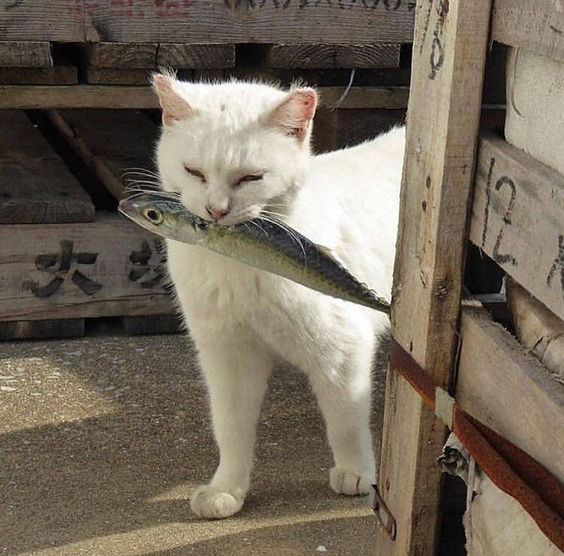

In [4]:
# Load and show the image
image_path = './images/kitty.jpeg'
og_image = Image.open(image_path)
og_image

Create 3 versions using different JPEG compression levels. You can do this with `skimage` or locally with a photo editor. You might also consider using [ImageMagick – Convert, Edit, or Compose Digital Images](https://imagemagick.org/index.php), a command line base photo editing tool. If you have never used this (or were aware of it), it given you the power of Photoshop from scripting or the command line.Show the photos in the notebook. 

Can you visually see a distinction between them?


Compression with `skimage` 

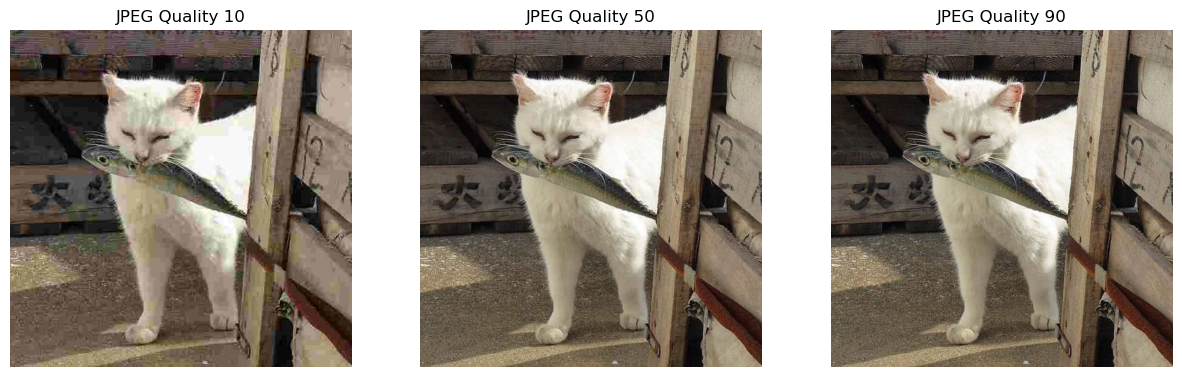

In [5]:
import matplotlib.pyplot as plt

# Compressions
qualities = [10,50,90]

# Helper functions for the compressions
def display_imgs(im, qual, i):
    path = f"./images/kitty_{qual}.jpg"
    im.save(path, format='JPEG', quality=qual) # Save images

    # Load images (for display)
    image = Image.open(path)

    # Display the images with different quality levels
    axs[i].imshow(image)
    axs[i].set_title(f"JPEG Quality {qual}")
    axs[i].axis('off')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i,q in enumerate(qualities):
    display_imgs(og_image, q, i)

plt.show()



- **Quality 10**: The image has noticeable degradation, with choppy colours, blurring, and less detail. The overall sharpness and clarity are significantly reduced.
- **Quality 50**: The image quality is fairly good overall, but some of the colours are more intense and the finer details are a tiny bit murkey (particularly around edges)
- **Quality 90**: Sharpest image. At a higher level, the image maintains high quality with minimal visible deterioration. Details in textures and edges are well-preserved.

  
Lower JPEG quality levels reduce file size but at the cost of image degredation. For images where clarity is important, a higher quality setting like 90 is preferable. However, for cases where file size is a priority and some quality loss is acceptable, a moderate setting like 50 can still be appropriate. ​

### Histogram Analysis

Agressive compressions algorithms will try to merge color variations into a single intensity to improve the compression. Plot the color histograms for each of the images along with the original. 

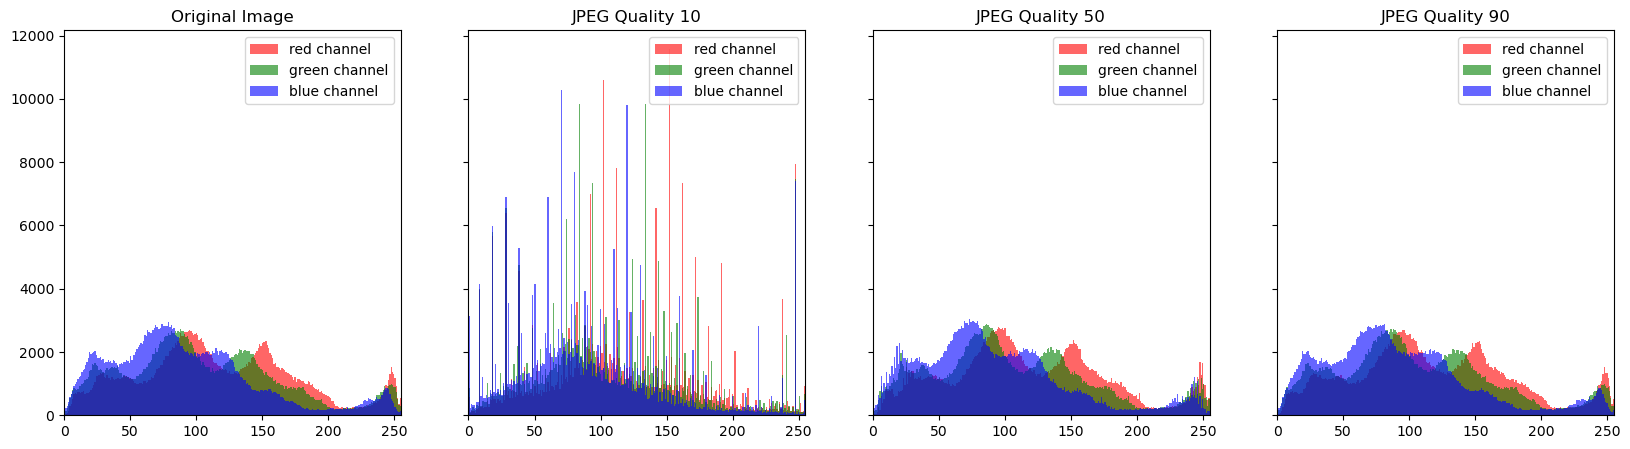

In [6]:
# Create and plot
import numpy as np

# Function to plot colour histograms
def plot_color_histograms(i, qual=None):
    if qual != None:
        path = f"./images/kitty_{qual}.jpg"
        title = f"JPEG Quality {qual}"
    else:
        path = f"./images/kitty.jpeg"
        title = "Original Image"

    # Load images as numpy arrays for histogram analysis
    im = Image.open(path)
    image_np = np.array(im)
    ax = axs[i]

    # Create colour histograms
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        ax.hist(image_np[..., i].ravel(), bins=256, color=color, alpha=0.6, label=f'{color} channel')
    ax.set_title(title)
    ax.set_xlim(0, 255)
    ax.legend(loc='upper right')


# Plot histograms
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# For og image
plot_color_histograms(0)

# For various qualities
for i,qual in enumerate(qualities):
    plot_color_histograms((i+1), qual)

plt.show()


> #### Results:
> 
> - **Original Image**: The color distributions are smooth and continuous across the intensity values, showing a natural range without abrupt changes. Each channel retains a broad range of values, indicating the original color variations.
>
> - **Quality 10**: The histogram shows a highly irregular pattern with many spikes and gaps. This is due to 'aggressive compression', which merges a wide range of similar colors into fewer intensity levels. The result is a significant loss of color variation, causing visible artifacts and reduced image quality.
>
> - **Quality 50**: The histogram shows more noticeable spikes and reductions in color intensities compared to the original image. Some color details have been merged or simplified, causing minor loss in the range of colors.
>   
> - **Quality 90**: The histogram remains very close to the original, with only slight changes. The distributions are mostly continuous, indicating that the high quality preserves most of the color information.
> 
> 
> #### Conclusion:
> Aggressive compression, especially at quality level 10, clearly merges color variations to reduce data size, as evidenced by the spiky histogram. This loss of color fidelity corresponds to the visible artifacts observed in the compressed images.

### Comparison of Histograms

Research an algorithm that provides for the _comparison of histograms_. You can look at existing Python modules or packages, academic papers, or create your own. Implement or apply the algorithm and compare each compressed JPG image to the original. 

Provide a brief description of your approach, the algorithm (including citation), and any results.



**Bhattacharyya Distance**

One approach for comparing histograms is the Bhattacharyya distance. This method is widely used in image processing and pattern recognition to measure the similarity between two probability distributions. It calculates a metric that quantifies the overlap between two histograms, with smaller distances indicating higher similarity.

#### Algorithm overview:

Algorithm Overview:
The Bhattacharyya distance between two normalized histograms P and Q is defined as:

${D_B}(P,Q) = -\ln{(\sum^{N}_{i=1}\sqrt{P(i)⋅Q(i)})}$

- P(i) and Q(i) are the values of the histograms (or probability distributions) at bin i.
- N is the number of bins.
  
If the two distributions are identical, the Bhattacharyya distance will be 0. Larger values indicate greater dissimilarity.

#### Implementation:

Use the Bhattacharyya distance to compare each compressed image's histogram to the histogram of the original image across the RGB channels. Each color channel will be computed separately.


In [7]:
from scipy.spatial.distance import euclidean
from skimage.color import rgb2gray

# Normalize the histogram so that the sum is 1.
def normalize_histogram(hist):
    norm = hist / np.sum(hist)
    return norm

# Calculate the Bhattacharyya distance between two histograms.
def bhattacharyya_distance(hist1, hist2):
    bhat_dist = -np.log(np.sum(np.sqrt(hist1 * hist2)))
    return bhat_dist

# Compute normalized histograms for each color channel.
def compute_histogram(image, bins=256):
    hist_r, _ = np.histogram(image[..., 0], bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[..., 1], bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[..., 2], bins=bins, range=(0, 256))

    n_hist_r = normalize_histogram(hist_r)
    n_hist_g = normalize_histogram(hist_g)
    n_hist_b = normalize_histogram(hist_b)
    
    return n_hist_r, n_hist_g, n_hist_b


In [8]:

# Calculate histograms for the original image
og_path = f"./images/kitty.jpeg"
og_im = Image.open(og_path)
og_image_np = np.array(og_im)

hist_og_r, hist_og_g, hist_og_b = compute_histogram(og_image_np)


In [9]:

def compare_across(qual):
    path = f"./images/kitty_{qual}.jpg"

    # Load images as numpy arrays for histogram analysis
    im = Image.open(path)
    image_np = np.array(im)
    
    dist_quality = compare_histograms(image_np)

    return dist_quality
    

# Compute Bhattacharyya distances for each compressed image
def compare_histograms(image_np):
    hist_r, hist_g, hist_b = compute_histogram(image_np)
    dist_r = bhattacharyya_distance(hist_og_r, hist_r)
    dist_g = bhattacharyya_distance(hist_og_g, hist_g)
    dist_b = bhattacharyya_distance(hist_og_b, hist_b)
    return dist_r, dist_g, dist_b

# Compare each compressed image to the original
for i,qual in enumerate(qualities):
    dist_quality = compare_across(qual)
    print(f"Quality {qual}: {dist_quality}")



Quality 10: (0.07708643791846352, 0.058825301298517846, 0.0701258811324494)
Quality 50: (0.0006903340996145398, 0.0006654807306982666, 0.0010968461470004668)
Quality 90: (5.6384684816059824e-05, 6.212661608179105e-05, 6.76121401572794e-05)


> ### Results
> The Bhattacharyya distances between the color histograms of the original image and each compressed image are as follows (for each channel: red, green, blue):
> 
>**Quality 10:**
> - Red: 0.07709
> - Green: 0.05883
> - Blue: 0.07013
>
> **Quality 50:**
> - Red: 0.00069
> - Green: 0.00067
> - Blue: 0.00109
>
> **Quality 90:**
> - Red: 5.638e-05
> - Green: 6.212e-05
> - Blue: 6.761e-05
>
> ### Analysis
> 
> **Quality 10:** The distances are significantly higher than in a compression of 50 and 90, especially in the red and blue channels. This reflects the aggressive compression and the merging of color variations, resulting in noticeable artifacts and reduced color fidelity.
>
> **Quality 50:** There is a slight positive in distances, showing that moderate compression begins to introduce some differences in color distributions.
> 
> **Quality 90:** The distances are very close to zero, indicating a high similarity between the histograms of the original and compressed images, as expected for high-quality compression.
>
> 
>
>### Conclusion
> The Bhattacharyya distance effectively highlights the degradation of color information in the compressed images. Lower quality settings result in larger distances, indicating a greater loss of similarity to the original image’s color distribution. This metric aligns well with the visual artifacts observed at lower quality levels

### References:
**Technical**
- Image processing with Python: https://datacarpentry.org/image-processing/02-image-basics.html
- Check file size: https://stackoverflow.com/questions/2104080/how-do-i-check-file-size-in-python
- skimage usage: https://datacarpentry.org/image-processing/03-skimage-images.html
- gzip with python: https://stackoverflow.com/questions/8156707/gzip-a-file-in-python

**File Processing**
- What is a BMP file?: https://www.adobe.com/creativecloud/file-types/image/raster/bmp-file.html
- BMP vs. PNG: https://www.adobe.com/creativecloud/file-types/image/comparison/bmp-vs-png.html#:~:text=BMPs%20use%20a%20simple%20algorithm%20to%20efficiently%20compress%20images%20into%20small%20sizes.
- numpy array to jpeg: https://stackoverflow.com/questions/47361966/scikit-image-write-a-ndarray-to-image-with-imsave-read-back-with-imread-data

**Histograms**
- Colour histograms: https://datacarpentry.org/image-processing/05-creating-histograms.html
- https://en.wikipedia.org/wiki/Bhattacharyya_distance

**Histogram Comparisons**
- Comparison methodologies: https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html
- OpenCV: https://pypi.org/project/opencv-python/
- Bhattacharyya distance: https://en.wikipedia.org/wiki/Bhattacharyya_distance
- Implementing + Interpreting Bhattacharyya: https://stats.stackexchange.com/questions/51848/bhattacharyya-distance-for-histograms